<a href="https://colab.research.google.com/github/Fred-akoh/School-of-Statisticians/blob/main/School_of_Statisticians_Wk_5_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What are the main columns in the dataset and what does each represent?


In [2]:
import pandas as pd
my_data = pd.read_csv("/content/week5_customer_reviews.csv")
my_data.head(7)
for col in my_data.columns:
  print(col)
  my_data.head(5)
  my_data.head()


  #Main columns in the dataset
  data = my_data[['cleaned_review','customer_name','product','raw_review']]
  print (data)


# Messy Elements include Emoji's and some special characters from raw review.
  # To Count the number of unique products:
  unique_products = my_data['product'].nunique()
  print("Number of unique products", unique_products)




  #2
  #Cleaning Task
  import re



review_id
      cleaned_review      customer_name     product  \
0                NaN     Craig Mckenzie     Toaster   
1                NaN      Brian Coleman  Smartwatch   
2                NaN       Jeremy Price  Smartwatch   
3                NaN          Jose Roth  Phone Case   
4                NaN         Allen Sims  Headphones   
...              ...                ...         ...   
4995             NaN   Kristina Rodgers  Headphones   
4996             NaN  Mr. Thomas Horton  Smartwatch   
4997             NaN     Maureen Lucero         Mug   
4998             NaN     Theresa Nelson       Shoes   
4999             NaN      Michael Ponce     Blender   

                                             raw_review  
0     Little understand try sell citizen create no m...  
1                                   Hair emplo\(yee on.  
2                         Five p~{}#layer rest himself.  
3     Off try shake care health nation identify mode...  
4     New m~,(!🗑@!:~y sport management 

How many unique products are reviewed in the dataset?
Ans: There are 7 unique products as identified above. Namely;
Toaster
Smartwatch
PhoneCase
Headphones
Mug
Shoes
Blender


What are some examples of messy elements in the raw_review column?
Ans: Some messy elements identified in the raw_review column are: Special characters(^, },), @), Emoji"s, white spaces etc

In [3]:
#to see the end of the data
my_data.tail()

,review_id,customer_name,raw_review,product,rating,date,cleaned_review,review_length
4995,4996,Kristina Rodgers,"Mo*)}🗑)😡%🙄,;dern back nation something play on...",Headphones,1,2025-05-04,NaN,NaN
4996,4997,Mr. Thomas Horton,Heavy heart final increas.~e.,Smartwatch,4,2025-05-26,NaN,NaN
4997,4998,Maureen Lucero,Culture past boy team order y/+?@(🔥^^eah list.,Mug,5,2025-05-22,NaN,NaN
4998,4999,Theresa Nelson,White retur🙄((@(n strategy character recognize...,Shoes,3,2025-05-02,NaN,NaN
4999,5000,Michael Ponce,Drop particular imagine administration tr🗑😡'#<...,Blender,2,2025-05-11,NaN,NaN


2. Cleaning Tasks

i. How can you remove all special characters, emojis, and numbers from the raw_review column using Python?
1. Install the re library used for removing special characters
2. define your input is a string

ii. Write a function in Python that strips extra spaces and lowercases the review text.


iii. What is the difference between raw_review and cleaned_review after text cleaning? Illustrate with 3 examples.
1. Raw_Review: Hair emplo\(yee on vs Cleaned_Review: hair employee on
2. Raw_Review: New m~,(!🗑@!:~y sport management outside cente.. vs Cleaned_Review: new my sport management outside center age opt...
3. Raw_Review: Culture past boy team order y/+?@(🔥^^eah list vs Cleaned_Review: modern back nation something play on note church

We can see that the emoji's and special characters in the raw_review have been cleaned and now makes a better meaning.

In [4]:
#Data Cleaning Operation
def clean_text(text):
  text = str(text)
  # Removing characters that are not letters or whitespace
  text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  # Replacing multiple spaces with a single space
  text = re.sub(r'\s+', ' ', str(text))
  return text.strip().lower()

In [21]:
#Cleaned_review
my_data['cleaned_review']=my_data['raw_review'].apply(clean_text)

#Recalculating review length as number of words
my_data['review_length'] = my_data['cleaned_review'].apply(lambda x: len(x.split()))

In [6]:
display(my_data.head())
display(my_data.tail())

,review_id,customer_name,raw_review,product,rating,date,cleaned_review,review_length
0,1,Craig Mckenzie,Little understand try sell citizen create no m...,Toaster,3,2025-05-31,little understand try sell citizen create no m...,NaN
1,2,Brian Coleman,Hair emplo\(yee on.,Smartwatch,3,2025-06-02,hair employee on,NaN
2,3,Jeremy Price,Five p~{}#layer rest himself.,Smartwatch,4,2025-05-01,five player rest himself,NaN
3,4,Jose Roth,Off try shake care health nation identify mode...,Phone Case,5,2025-05-17,off try shake care health nation identify mode...,NaN
4,5,Allen Sims,"New m~,(!🗑@!:~y sport management outside cente...",Headphones,3,2025-05-19,new my sport management outside center age opt...,NaN


,review_id,customer_name,raw_review,product,rating,date,cleaned_review,review_length
4995,4996,Kristina Rodgers,"Mo*)}🗑)😡%🙄,;dern back nation something play on...",Headphones,1,2025-05-04,modern back nation something play on note church,NaN
4996,4997,Mr. Thomas Horton,Heavy heart final increas.~e.,Smartwatch,4,2025-05-26,heavy heart final increase,NaN
4997,4998,Maureen Lucero,Culture past boy team order y/+?@(🔥^^eah list.,Mug,5,2025-05-22,culture past boy team order yeah list,NaN
4998,4999,Theresa Nelson,White retur🙄((@(n strategy character recognize...,Shoes,3,2025-05-02,white return strategy character recognize dinn...,NaN
4999,5000,Michael Ponce,Drop particular imagine administration tr🗑😡'#<...,Blender,2,2025-05-11,drop particular imagine administration traditi...,NaN


3. Creating New Columns
1. How would you compute the number of words in each review and store it in a new column review_length?

11. Can you categorize reviews into ‘Positive’, ‘Neutral’, or ‘Negative’ using the rating column? Create a new column sentiment.

111. Which product received the most negative reviews (rating ≤ 2)?
The product with the most negative reviews is: Blender with 316 negative reviews


In [7]:
#Review Rating
# Define sentiment based on rating
def get_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# creating a new column called  sentiment column
my_data['sentiment'] = my_data['rating'].apply(get_sentiment)

# Result
my_data[['rating', 'sentiment']].head(10)

,rating,sentiment
0,3,Neutral
1,3,Neutral
2,4,Positive
3,5,Positive
4,3,Neutral
5,2,Negative
6,5,Positive
7,1,Negative
8,4,Positive
9,4,Positive


Which product received the most negative reviews (rating ≤ 2)?

In [8]:
# To show which product received the most negative review
negative_reviews = my_data[my_data['sentiment'] == 'Negative']
product_counts = negative_reviews['product'].value_counts()
most_negative_product = product_counts.idxmax()
print(f"The product with the most negative reviews is: {most_negative_product}")


The product with the most negative reviews is: Blender


In [16]:
# Which product received the most negative reviews (rating ≤ 2)
negative_reviews_df = my_data[my_data['rating'] <= 2]

# Count number of negative reviews per product
product_counts = negative_reviews_df['product'].value_counts()
most_negative_product = product_counts.idxmax()
negative_review_count = product_counts.max()
my_data[my_data['rating']<= 2]['product'].value_counts()

print(f"The product with the most negative reviews (rating <= 2) is: {most_negative_product} with {negative_review_count} negative reviews.")

The product with the most negative reviews (rating <= 2) is: Blender with 316 negative reviews.


4. What’s the average review length for positive vs negative reviews?
The average Review_Length for the reviews are:
Negative    9.641902
Positive    9.531504

In [22]:
#Filter only positive and negative reviews
filtered_my_data = my_data[my_data['sentiment'].isin(['Positive', 'Negative'])]

# Calculate average review length by sentiment
average_review_lengths= filtered_my_data.groupby('sentiment')['review_length'].mean()

#Display Result
print("Average Review Length by Sentiment:")
print(average_review_lengths)



Average Review Length by Sentiment:
sentiment
Negative    9.641902
Positive    9.531504
Name: review_length, dtype: float64


4. Plot a bar chart showing the number of reviews per product. What insights can you draw?


/tmp/ipython-input-26-1366718672.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')


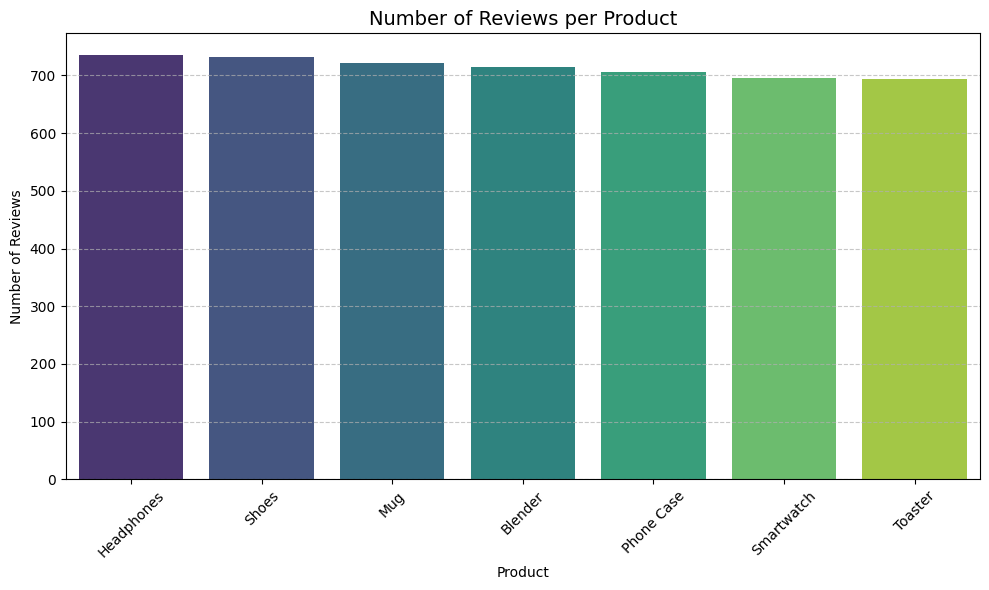

In [26]:
#Bar Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of reviews per product
review_counts = my_data['product'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')
plt.title('Number of Reviews per Product', fontsize=14)
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The average review legth of the products by rating as slightly similar. There's no significant relationship between the review length and the sentiment(Positive or negative)


In [28]:
import matplotlib.pyplot as plt

# Group by rating and calculate average review length
avg_length_by_rating = my_data.groupby('rating')['review_length'].mean().round(2)

# Print values
print("📊 Average Review Length by Rating:\n")
print(avg_length_by_rating)


📊 Average Review Length by Rating:

rating
1    9.67
2    9.61
3    9.45
4    9.43
5    9.63
Name: review_length, dtype: float64


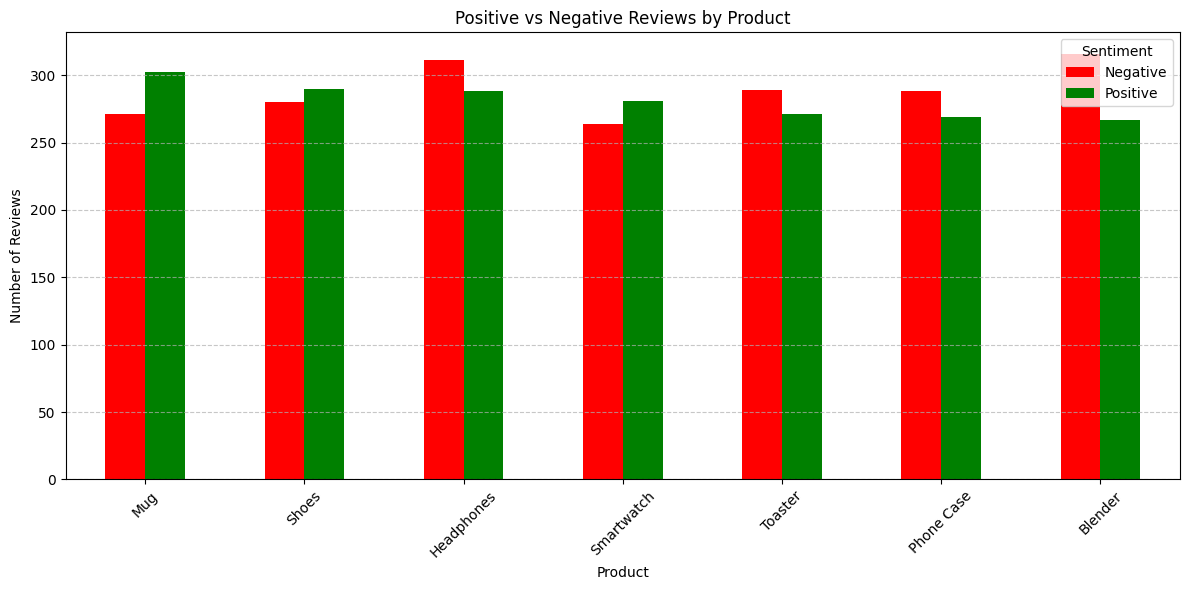

In [30]:
import matplotlib.pyplot as plt

#Bar Plot to show the Review by Sentiment
sentiment_df = my_data[my_data['sentiment'].isin(['Positive', 'Negative'])]

# Counting reviews per product and sentiment
sentiment_counts = sentiment_df.groupby(['product', 'sentiment']).size().unstack(fill_value=0)

# Plotting a grouped bar chart
sentiment_counts = sentiment_counts.sort_values(by='Positive', ascending=False)  # optional: sort by positive

# Plot
ax = sentiment_counts.plot(kind='bar', figsize=(12, 6),
                           color={'Positive': 'green', 'Negative': 'red'})

plt.title('Positive vs Negative Reviews by Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Conclusion
From the above chart, there's no significant relationship between the number of reviews and the sentiment. The number of negative reviews coming from Blender slightly equals the number of positive reviews from Mug

In [31]:
#Word Count of Top 20 Negative Reviews
from collections import Counter
import pandas as pd

#Negative Reviews
negative_reviews = my_data[my_data['sentiment'] == 'Negative']

all_negative_text = ' '.join(negative_reviews['cleaned_review'].dropna())

#Tokenize into words
words = all_negative_text.split()

#Word frequencies
word_counts = Counter(words)

#T op 20 most common words
top_words = word_counts.most_common(20)

# Converting to a Data Frame
word_freq_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Displaying the top 20
print("Top 20 Most Frequent Words in Negative Reviews:")
print(word_freq_df)


Top 20 Most Frequent Words in Negative Reviews:
              Word  Frequency
0        candidate         35
1            along         34
2   administration         33
3            money         33
4         property         32
5             talk         32
6          foreign         32
7              eye         31
8             many         31
9             hope         31
10            wait         31
11            real         31
12       condition         31
13           least         31
14          animal         30
15            word         30
16     environment         30
17          summer         30
18            such         30
19             hot         30
